## Taller 6 Redes Neuronales

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('auto-mpg.data',
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )

In [3]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


- MPG: miles per gallon
- Cylinders: # de cilindros
- Displacement: volumen desplazado por los pistones
- Horsepower: caballos de potencia
- Weight: peso
- Acceleration: aceleración
- Model Year: año/modelo
- Origin: 1:USA, 2:Europa, 3:Japón

In [4]:
df.shape

(398, 8)

In [5]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(392, 8)

In [8]:
df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

0         USA
1         USA
2         USA
3         USA
4         USA
        ...  
393       USA
394    Europe
395       USA
396       USA
397       USA
Name: Origin, Length: 392, dtype: object

In [9]:
df['Origin'] = df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [10]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


In [11]:
pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='')

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True


In [12]:
df = pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='', dtype=int)

In [13]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


Separamos los datos en entrenamiento y prueba

In [14]:
train = df.sample(frac=0.8, random_state=100)
train.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
125,20.0,6,198.0,95.0,3102.0,16.5,74,0,0,1
142,26.0,4,79.0,67.0,1963.0,15.5,74,1,0,0
278,31.5,4,89.0,71.0,1990.0,14.9,78,1,0,0
254,20.2,6,200.0,85.0,2965.0,15.8,78,0,0,1
328,30.0,4,146.0,67.0,3250.0,21.8,80,1,0,0


In [15]:
test = df.drop(train.index)
test.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,0,0,1
13,14.0,8,455.0,225.0,3086.0,10.0,70,0,0,1


In [16]:
print(train.shape)
print(test.shape)

(314, 10)
(78, 10)


In [17]:
train.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.579299,5.455414,192.562102,103.767516,2959.312102,15.518471,75.964968,0.171975,0.219745,0.608280
std,7.877216,1.691811,103.701434,38.123560,856.880939,2.705097,3.672110,0.377961,0.414735,0.488914
min,9.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.125000,4.000000,98.000000,75.000000,2193.000000,13.900000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,146.000000,94.500000,2764.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,29.375000,8.000000,260.000000,120.000000,3612.000000,17.000000,79.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [18]:
train_X = train.copy()
test_X = test.copy()

In [19]:
train_y = train_X.pop('MPG')
test_y = test_X.pop('MPG')

In [20]:
train_X.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
125,6,198.0,95.0,3102.0,16.5,74,0,0,1
142,4,79.0,67.0,1963.0,15.5,74,1,0,0
278,4,89.0,71.0,1990.0,14.9,78,1,0,0
254,6,200.0,85.0,2965.0,15.8,78,0,0,1
328,4,146.0,67.0,3250.0,21.8,80,1,0,0


In [21]:
train_y.head()

125    20.0
142    26.0
278    31.5
254    20.2
328    30.0
Name: MPG, dtype: float64

In [22]:
train_X.dtypes

Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Europe            int64
Japan             int64
USA               int64
dtype: object

In [23]:
import tensorflow as tf

In [24]:
tf.__version__

'2.17.0'

In [25]:
tf.keras.layers.Normalization

keras.src.layers.preprocessing.normalization.Normalization

In [26]:
norm = tf.keras.layers.Normalization()

In [27]:
norm.adapt(np.array(train_X))

In [28]:
norm.mean.numpy()

array([[5.4554138e+00, 1.9256210e+02, 1.0376752e+02, 2.9593120e+03,
        1.5518472e+01, 7.5964966e+01, 1.7197452e-01, 2.1974522e-01,
        6.0828024e-01]], dtype=float32)

In [29]:
norm.variance.numpy()

array([[2.8531077e+00, 1.0719739e+04, 1.4487772e+03, 7.3190656e+05,
        7.2942448e+00, 1.3441448e+01, 1.4239928e-01, 1.7145726e-01,
        2.3827539e-01]], dtype=float32)

In [30]:
np.sqrt(norm.variance.numpy())

array([[1.6891145e+00, 1.0353617e+02, 3.8062805e+01, 8.5551538e+02,
        2.7007859e+00, 3.6662581e+00, 3.7735829e-01, 4.1407397e-01,
        4.8813459e-01]], dtype=float32)

In [31]:
train_X[:1]

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
125,6,198.0,95.0,3102.0,16.5,74,0,0,1


In [32]:
norm(train_X[:1]).numpy()

array([[ 0.32240927,  0.05252171, -0.23034343,  0.166786  ,  0.36342323,
        -0.5359595 , -0.45573273, -0.5306907 ,  0.8024831 ]],
      dtype=float32)

### Punto 1

In [33]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [34]:
categoricas = ['Europe', 'Japan', 'USA']
df_continuas = df.drop(columns=categoricas)



In [35]:
df_continuas.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70


In [36]:
train = df_continuas.sample(frac=0.8, random_state=100)
test = df_continuas.drop(train.index)

print(train.shape)
print(test.shape)

(314, 7)
(78, 7)


In [37]:
train_X = train.copy()
test_X = test.copy()
train_y = train_X.pop('MPG')
test_y = test_X.pop('MPG')

In [38]:
tf.keras.layers.Normalization
norm = tf.keras.layers.Normalization()
norm.adapt(np.array(train_X))

In [39]:
linear_model = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=1)
])


linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [40]:
%%time
history = linear_model.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 24.4001 - val_loss: 21.7971
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.6258 - val_loss: 21.0556
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.7259 - val_loss: 20.3130
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.1663 - val_loss: 19.6541
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.1539 - val_loss: 18.9233
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.5803 - val_loss: 18.2797
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.4641 - val_loss: 17.6247
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.6735 - val_loss: 16.9081
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.4645 - val_loss: 16.2270
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.5634 - val_loss: 15.5567
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.9998 - val_loss: 14.8980
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.5

### Punto 2

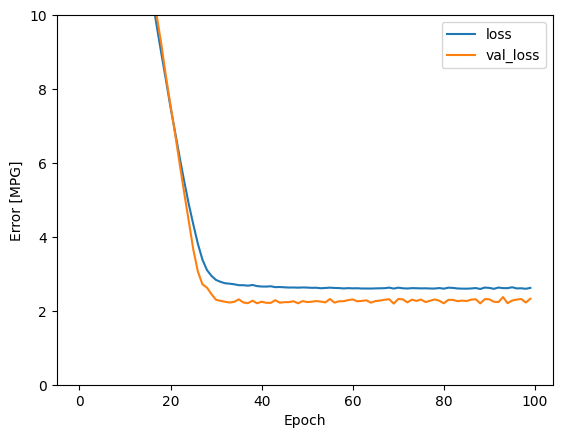

In [41]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

### Punto 3 Cambio de Número de Neuronas

In [42]:
# Cambio de 1 Neurona a 4 neuronas

linear_model1 = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=4)
])


linear_model1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')



history1 = linear_model1.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.4648 - val_loss: 21.8012
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.2793 - val_loss: 21.1365
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.8718 - val_loss: 20.4371
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.5703 - val_loss: 19.7281
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.8532 - val_loss: 19.1594
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.3008 - val_loss: 18.4477
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.5560 - val_loss: 17.7616
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.0521 - val_loss: 17.0704
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.0730 - val_loss: 16.4038
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.1998 - val_loss: 15.6966
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.4819 - val_loss: 15.0286
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.4

In [43]:
#Cambio de 4 Neuronas a 8 Neuronas
linear_model2 = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=8)
])


linear_model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')



history2 = linear_model2.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 23.9411 - val_loss: 21.7587
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.5064 - val_loss: 21.1406
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.3671 - val_loss: 20.3667
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.5502 - val_loss: 19.7554
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.3552 - val_loss: 19.0202
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.3330 - val_loss: 18.3154
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.5895 - val_loss: 17.6498
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.7151 - val_loss: 16.9707
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.8942 - val_loss: 16.3307
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.5501 - val_loss: 15.6725
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.2183 - val_loss: 15.0148
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.5

In [44]:
#Cambio de 8 Neuronas a 12 Neuronas
linear_model3 = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=12)
])


linear_model3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')


history3 = linear_model3.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 23.6039 - val_loss: 21.8748
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.3981 - val_loss: 21.2378
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.9357 - val_loss: 20.5326
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.3066 - val_loss: 19.8456
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.0252 - val_loss: 19.1115
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.5835 - val_loss: 18.4829
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.7617 - val_loss: 17.7935
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.9278 - val_loss: 17.0315
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.0195 - val_loss: 16.4261
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.2058 - val_loss: 15.7047
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.1858 - val_loss: 15.0286
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.6

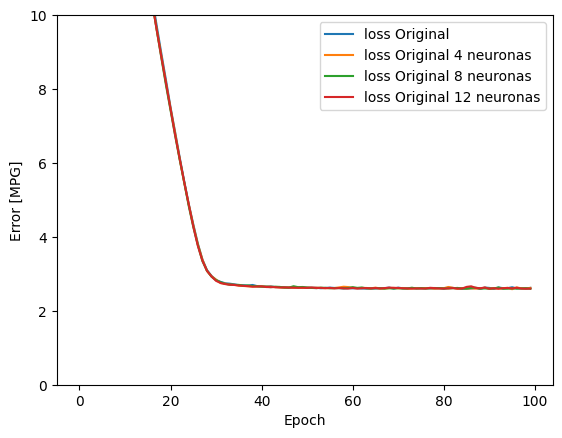

In [45]:
plt.plot(history.history['loss'], label='loss Original')
plt.plot(history1.history['loss'], label='loss Original 4 neuronas')
plt.plot(history2.history['loss'], label='loss Original 8 neuronas')
plt.plot(history3.history['loss'], label='loss Original 12 neuronas')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

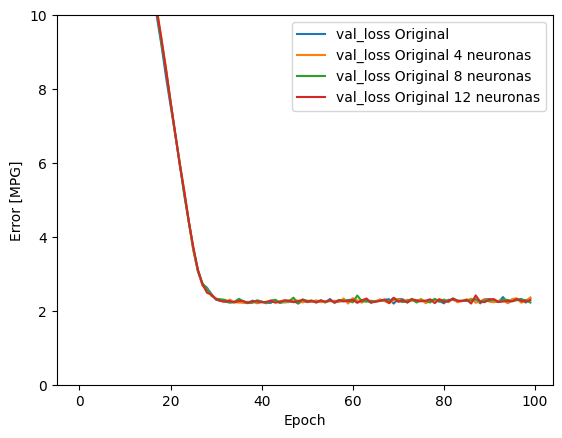

In [46]:
plt.plot(history.history['val_loss'], label='val_loss Original')
plt.plot(history1.history['val_loss'], label='val_loss Original 4 neuronas')
plt.plot(history2.history['val_loss'], label='val_loss Original 8 neuronas')
plt.plot(history3.history['val_loss'], label='val_loss Original 12 neuronas')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

### Punto 4 Cambio de Número de Capas

In [47]:
#Cambio de 1 capa a 2 capas 
linear_model4 = tf.keras.Sequential([
    norm,  
    tf.keras.layers.Dense(units=2, activation='relu'),    
    tf.keras.layers.Dense(units=1)
])

linear_model4.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

history4 = linear_model4.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split=0.2
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 21.6738 - val_loss: 15.1798
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.0222 - val_loss: 10.2845
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.8386 - val_loss: 8.3205
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.6383 - val_loss: 7.4273
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.9956 - val_loss: 6.4552
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.3904 - val_loss: 3.7457
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9144 - val_loss: 3.6068
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4331 - val_loss: 2.1895
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7845 - val_loss: 2.0330
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2920 - val_loss: 2.3971
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4113 - val_loss: 1.9197
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4070 - val_loss: 1.8

In [48]:
#Cambio de 2 capas a 4 capas 
linear_model5 = tf.keras.Sequential([
    norm,  
    tf.keras.layers.Dense(units=2, activation='relu'),  
    tf.keras.layers.Dense(units=2, activation='relu'),  
    tf.keras.layers.Dense(units=2, activation='relu'),  
    tf.keras.layers.Dense(units=1)
])

linear_model5.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

history5 = linear_model5.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split=0.2
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 23.6828 - val_loss: 21.6762
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.8350 - val_loss: 20.8762
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.0502 - val_loss: 20.0762
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.3451 - val_loss: 19.2762
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.4120 - val_loss: 18.4762
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.5586 - val_loss: 17.6762
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.2789 - val_loss: 16.8762
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.9378 - val_loss: 16.0762
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.4490 - val_loss: 15.2762
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.0219 - val_loss: 14.4762
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.7112 - val_loss: 13.6762
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.0

In [49]:
#Cambio de 4 capas a 6 capas 
linear_model6 = tf.keras.Sequential([
    norm,  
    tf.keras.layers.Dense(units=2, activation='relu'),  
    tf.keras.layers.Dense(units=2, activation='relu'),  
    tf.keras.layers.Dense(units=2, activation='relu'),  
    tf.keras.layers.Dense(units=2, activation='relu'),  
    tf.keras.layers.Dense(units=2, activation='relu'),  
    tf.keras.layers.Dense(units=1)
])

linear_model6.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

history6 = linear_model6.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split=0.2
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 21.6728 - val_loss: 10.5088
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8356 - val_loss: 4.0287
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.2832 - val_loss: 2.7476
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2019 - val_loss: 2.4575
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6335 - val_loss: 2.7547
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7855 - val_loss: 2.1233
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5111 - val_loss: 2.5656
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6040 - val_loss: 3.0819
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8531 - val_loss: 2.4360
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4640 - val_loss: 1.9577
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1738 - val_loss: 1.6876
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4137 - val_loss: 2.744

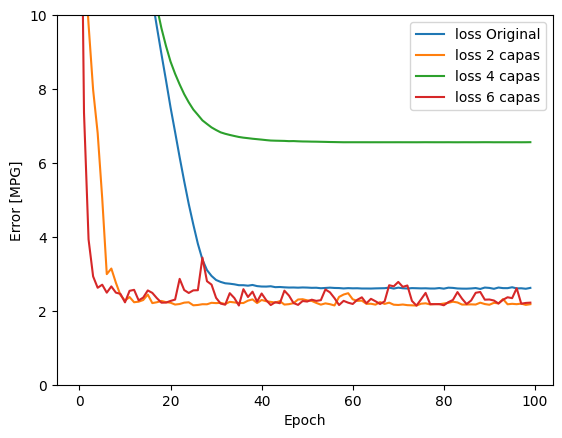

In [50]:
plt.plot(history.history['loss'], label='loss Original')
#plt.plot(history.history['val_loss'], label='val_loss Original')
plt.plot(history4.history['loss'], label='loss 2 capas')
#plt.plot(history4.history['val_loss'], label='val_loss 2 capas')
plt.plot(history5.history['loss'], label='loss 4 capas')
#plt.plot(history5.history['val_loss'], label='val_loss 4 capas')
plt.plot(history6.history['loss'], label='loss 6 capas')
#plt.plot(history6.history['val_loss'], label='val_loss 6 capas')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

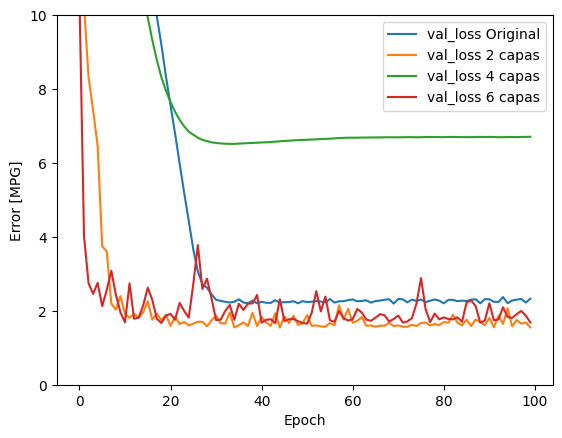

In [51]:
plt.plot(history.history['val_loss'], label='val_loss Original')
plt.plot(history4.history['val_loss'], label='val_loss 2 capas')
plt.plot(history5.history['val_loss'], label='val_loss 4 capas')
plt.plot(history6.history['val_loss'], label='val_loss 6 capas')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

### Punto 5 Cambio de Funciones de Activación

In [52]:
#Función de activación LeakyReLu
linear_model9 = tf.keras.Sequential([
    norm,  
    tf.keras.layers.Dense(units=2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.Dense(units=1)
])

linear_model9.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

history9 = linear_model9.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split=0.2
)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 22.7377 - val_loss: 18.2164
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.5299 - val_loss: 17.2724
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.5186 - val_loss: 13.6884
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.4589 - val_loss: 10.5874
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.4536 - val_loss: 9.0286
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.0095 - val_loss: 6.3221
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.1695 - val_loss: 4.1636
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.3277 - val_loss: 3.0371
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7643 - val_loss: 2.2425
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7351 - val_loss: 2.4551
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6375 - val_loss: 2.2740
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5994 - val_loss: 2.2605
Epo

In [53]:
#Función de activación sigmoid
linear_model7 = tf.keras.Sequential([
    norm,  
    tf.keras.layers.Dense(units=2, activation='sigmoid'),    
    tf.keras.layers.Dense(units=1)
])

linear_model7.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

history7 = linear_model7.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split=0.2
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 24.1231 - val_loss: 21.2402
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.6336 - val_loss: 19.3187
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.2069 - val_loss: 17.2583
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.0069 - val_loss: 15.0982
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.7992 - val_loss: 12.9896
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.1656 - val_loss: 11.1107
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.1133 - val_loss: 9.6325
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.7500 - val_loss: 6.9909
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3333 - val_loss: 5.3727
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.9061 - val_loss: 4.6674
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.4238 - val_loss: 4.3657
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9071 - val_

In [54]:
#Función de activación tahn
linear_model8 = tf.keras.Sequential([
    norm,  
    tf.keras.layers.Dense(units=2, activation='tanh'),    
    tf.keras.layers.Dense(units=1)
])

linear_model8.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

history8 = linear_model8.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split=0.2
)

Epoch 1/100


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 23.1418 - val_loss: 20.6936
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.5867 - val_loss: 17.3850
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.9087 - val_loss: 14.6107
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.5179 - val_loss: 11.8816
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.8963 - val_loss: 9.4995
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.1864 - val_loss: 7.8265
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.5076 - val_loss: 6.6140
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.5127 - val_loss: 6.0202
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.6480 - val_loss: 5.5677
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.3174 - val_loss: 5.1993
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.5442 - val_loss: 5.0571
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.4936 - val_loss: 4.3217
Ep

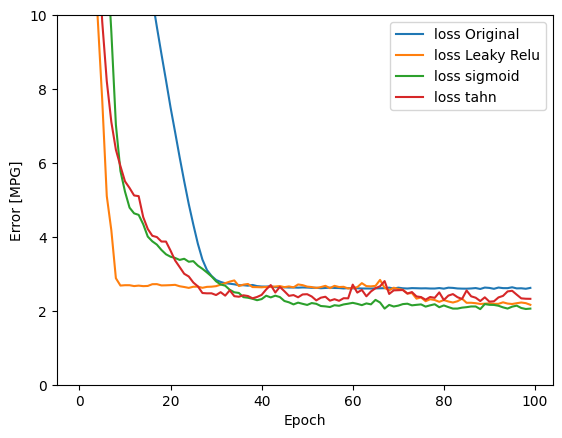

In [55]:
plt.plot(history.history['loss'], label='loss Original')
#plt.plot(history.history['val_loss'], label='val_loss Original')
plt.plot(history9.history['loss'], label='loss Leaky Relu')
#plt.plot(history9.history['val_loss'], label='val_loss Leaky Relu')
plt.plot(history7.history['loss'], label='loss sigmoid')
#plt.plot(history7.history['val_loss'], label='val_loss sigmoid')
plt.plot(history8.history['loss'], label='loss tahn')
#plt.plot(history8.history['val_loss'], label='val_loss tahn')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

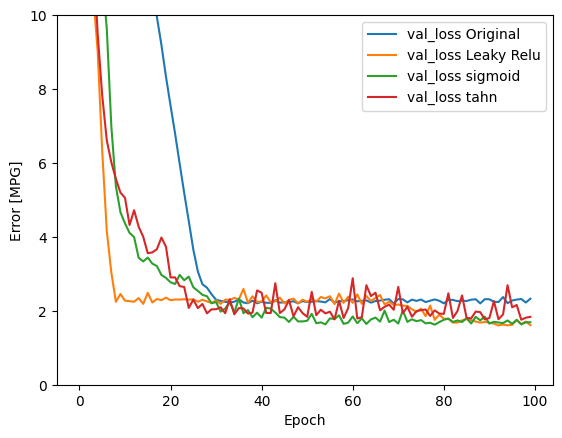

In [56]:
#plt.plot(history.history['loss'], label='loss Original')
plt.plot(history.history['val_loss'], label='val_loss Original')
#plt.plot(history9.history['loss'], label='loss Leaky Relu')
plt.plot(history9.history['val_loss'], label='val_loss Leaky Relu')
#plt.plot(history7.history['loss'], label='loss sigmoid')
plt.plot(history7.history['val_loss'], label='val_loss sigmoid')
#plt.plot(history8.history['loss'], label='loss tahn')
plt.plot(history8.history['val_loss'], label='val_loss tahn')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

### Punto 6

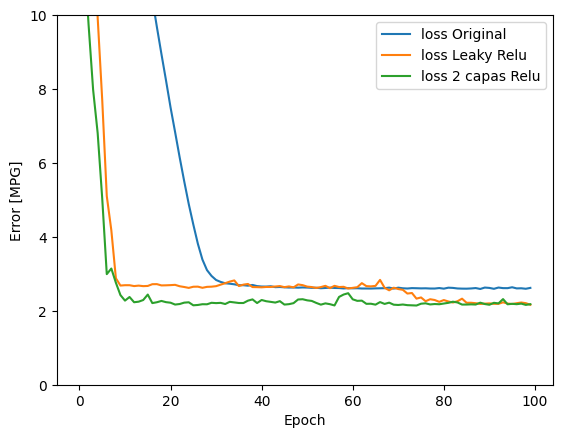

In [59]:
plt.plot(history.history['loss'], label='loss Original')
#plt.plot(history.history['val_loss'], label='val_loss Original')
plt.plot(history9.history['loss'], label='loss Leaky Relu')
#plt.plot(history9.history['val_loss'], label='val_loss Leaky Relu')
plt.plot(history4.history['loss'], label='loss 2 capas Relu')
#plt.plot(history4.history['val_loss'], label='val_loss 2 capas')

plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

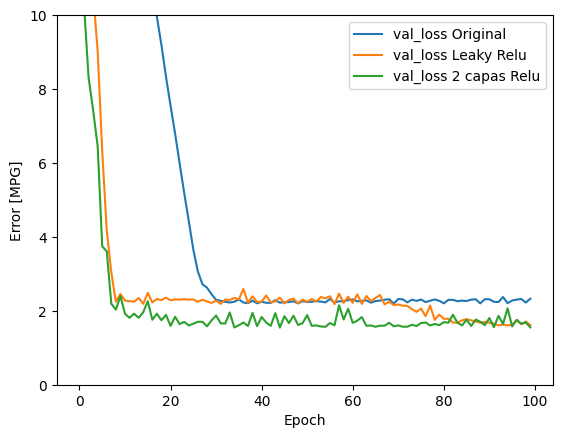

In [60]:
#plt.plot(history.history['loss'], label='loss Original')
plt.plot(history.history['val_loss'], label='val_loss Original')
#plt.plot(history9.history['loss'], label='loss Leaky Relu')
plt.plot(history9.history['val_loss'], label='val_loss Leaky Relu')
#plt.plot(history4.history['loss'], label='loss 2 capas')
plt.plot(history4.history['val_loss'], label='val_loss 2 capas Relu')

plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()